### Importing Libraries

In [11]:
!pip install pycaret
!pip install optuna-integration

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 3.6 MB/s eta 0:00:00


In [5]:
from pycaret.classification import *

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

 ### Reading Data

In [2]:
from google.colab import drive
drive.mount('/gdrive')
dataset = pd.read_csv('/gdrive/My Drive/Colab/Heart Disease Prediction/heart.csv')
dataset

Mounted at /gdrive


,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
# setup pycaret
exp_lead_scoring = setup(data=dataset, target = 'target',
                   fold_shuffle=True,
                   session_id = 42,
                   normalize = True,
                   transformation = True,
                   remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                   verbose=True)

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 14)"
5,Transformed train set shape,"(212, 14)"
6,Transformed test set shape,"(91, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


### Model Experimentation with pycaret

In [7]:
best_model = compare_models(fold = 10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.8636,0.9174,0.8939,0.8613,0.8738,0.7242,0.7324,0.0730
ridge,Ridge Classifier,0.8543,0.9244,0.9129,0.8491,0.8735,0.7010,0.7194,0.0690
lda,Linear Discriminant Analysis,0.8543,0.9244,0.9129,0.8491,0.8735,0.7010,0.7194,0.1010
nb,Naive Bayes,0.8541,0.9313,0.8697,0.8740,0.8675,0.7043,0.7129,0.0640
et,Extra Trees Classifier,0.8541,0.9292,0.8674,0.8687,0.8622,0.7053,0.7152,0.3730
lr,Logistic Regression,0.8496,0.9229,0.9038,0.8493,0.8681,0.6920,0.7120,0.8010
knn,K Neighbors Classifier,0.8494,0.9224,0.8606,0.8713,0.8604,0.6954,0.7070,0.1160
rf,Random Forest Classifier,0.8357,0.9159,0.8780,0.8417,0.8534,0.6647,0.6799,0.2370
lightgbm,Light Gradient Boosting Machine,0.8353,0.9089,0.8682,0.8539,0.8504,0.6634,0.6856,0.1960
xgboost,Extreme Gradient Boosting,0.8167,0.8999,0.8515,0.8298,0.8340,0.6274,0.6402,0.1640


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [8]:
# create a model which gives the highest accuracy

qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8182,0.8667,0.8333,0.8333,0.8333,0.6333,0.6333
1,0.8182,0.8833,0.9167,0.7857,0.8462,0.6271,0.6383
2,0.9048,0.9722,0.9167,0.9167,0.9167,0.8056,0.8056
3,0.9048,0.8889,1.0000,0.8571,0.9231,0.8000,0.8165
4,0.9524,0.9722,1.0000,0.9231,0.9600,0.9014,0.9058
5,0.7143,0.8364,0.6364,0.7778,0.7000,0.4324,0.4404
6,0.8571,0.9273,0.9091,0.8333,0.8696,0.7123,0.7156
7,0.9524,0.9727,0.9091,1.0000,0.9524,0.9050,0.9091
8,0.8571,0.8909,1.0000,0.7857,0.8800,0.7097,0.7416


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

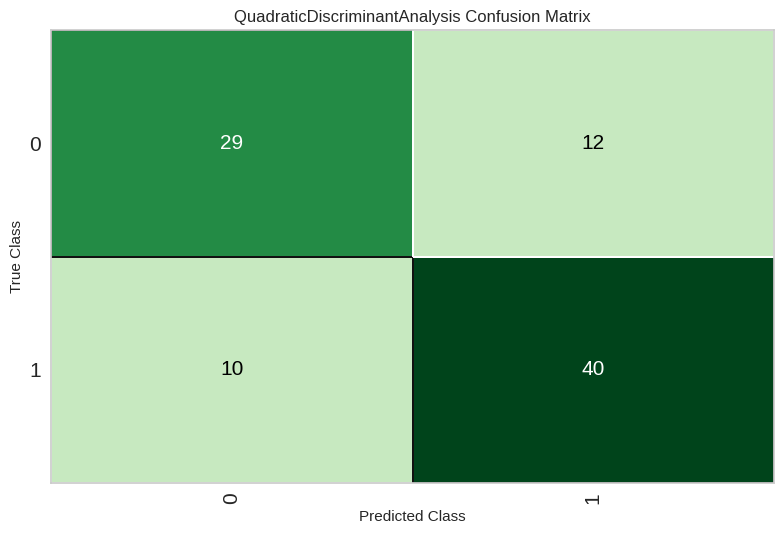

In [9]:
# create feature importance plot
plot_model(qda, plot='confusion_matrix')

In [12]:
# Tune the hyper parameters of the lr model using optuna on 10 folds and optimise AUC as that was our system metric,
# hence we will optimise AUC

tuned_lr_optuna,tuner_1 = tune_model(qda,
                                   search_library = 'optuna',
                                   fold = 10,
                                   optimize = 'auc',
                                   choose_better = True,
                                   return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9083,0.8333,1.0000,0.9091,0.8197,0.8333
1,0.7273,0.8250,0.9167,0.6875,0.7857,0.4310,0.4658
2,0.8095,0.9537,0.7500,0.9000,0.8182,0.6216,0.6331
3,0.8095,0.9537,0.9167,0.7857,0.8462,0.6000,0.6124
4,0.9524,0.9907,1.0000,0.9231,0.9600,0.9014,0.9058
5,0.8571,0.8909,0.8182,0.9000,0.8571,0.7149,0.7182
6,0.8571,0.9273,0.9091,0.8333,0.8696,0.7123,0.7156
7,0.9524,1.0000,0.9091,1.0000,0.9524,0.9050,0.9091
8,0.8571,0.8909,1.0000,0.7857,0.8800,0.7097,0.7416


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn:Searching the best hyperparameters using 212 samples...
INFO:optuna_integration.sklearn:Finished hyperparameter search!


In [13]:
# Print the final models configuration so that we can use it in the model retraining pipeline
print(tuned_lr_optuna)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.6917408971846616,
                              store_covariance=False, tol=0.0001)
